<a href="https://colab.research.google.com/github/SakshiGaikwad22/PRODIGY_DS_01/blob/main/Prodigy_DS_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder



In [ ]:
df = pd.read_csv("/content/bank-full.csv", sep=';')  # update path if needed
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Step 3: Preprocessing
# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
# Step 4: Define Features and Target
X = df.drop('y', axis=1)   # Independent features
y = df['y']                # Target: whether customer subscribed



In [ ]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 6: Build and Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
# Step 7: Make Predictions
y_pred = clf.predict(X_test)


In [ ]:
# Step 8: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[11596   370]
 [ 1053   545]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.34      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564

Accuracy: 0.8950899439693306


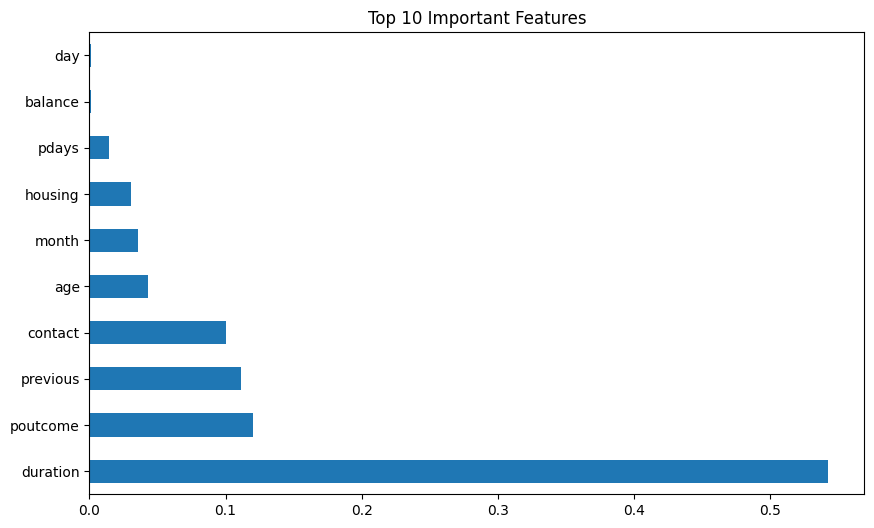

In [ ]:
# Step 9: Visualize Feature Importance
plt.figure(figsize=(10,6))
feat_importance = pd.Series(clf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
